# Analisis de Componentes Principales

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd


In [2]:
#load Wine data
data=load_wine()
X=data.data
y=data.target
ind=data.feature_names

In [3]:
X=pd.DataFrame(X,columns=ind)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
y=pd.Series(y)
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int32

In [5]:
from sklearn.pipeline import make_pipeline
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=95)
pipeline=make_pipeline( StandardScaler(),LDA(n_components=2),LogisticRegression(random_state=1))

pipeline.fit(X_train,y_train)
predicts=pipeline.predict(X_test)

pipeline.score(X_test,y_test)

1.0

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

accuracy_score(y_test,predicts)

scores=-1*cross_val_score(estimator=pipeline,X=X_train,y=y_train, cv=10)
scores

array([-0.92307692, -1.        , -1.        , -1.        , -0.91666667,
       -1.        , -1.        , -0.83333333, -1.        , -1.        ])

(0.5, 1.0)

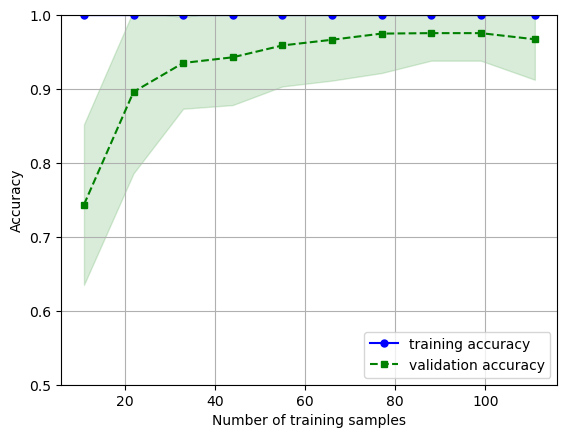

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes,train_scores,test_scores=learning_curve(estimator=pipeline,X=X_train,
                                                    y=y_train, train_sizes=np.linspace(0.1,1,10),cv=10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(train_sizes,train_mean,color='blue',marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
                 train_mean+train_std,
                 train_mean-train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes,test_mean, color='green', linestyle='--',
         marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,
                 test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1.0])

